<h1> INDICE </h1>
<hr /> 
<br />

 1. Introducción...........................................................................................................1

 2. Análisis de opciones de nuevo enfoque..................................................................................1

    2.1. Opción 1.........................................................................................................3

    2.2. Opción 2.........................................................................................................6

    2.3. Opción 3.........................................................................................................7

 3. Conclusión.............................................................................................................9

 4. Anexo..................................................................................................................9
<br />

# INTRODUCCIÓN
<hr />
El nuevo enfoque para la estrategia operativa de 2021, se obtendrá con el análisis del historial de las de los servicios realizados. Se propone analizar la viabilidad de tres posibles opciones, a través de las rutas de importación y exportación, tanto los niveles de ingresos como el flujo de las rutas. Además se hará un análisis de los medios de transporte utilizados y los países que más generan ingresos para la empresa.

El comportamiento de los ingresos que generan las rutas de exportación e importación, permitirá determinar que opción de enfoque debe ser aplicado en la estrategia operativa de 2021.


# ANÁLISIS DE OPCIONES DE NUEVO ENFOQUE
<hr />

Iniciamos con el exploración de la base de datos proporcionada, para visualizar el comportamiento de la misma  

In [1]:
#Inicio de código importando librerías
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
# Cargar los datos en el dataframe
file_data = "synergy_logistics_database.csv"
synergy_data = pd.read_csv(file_data).set_index('register_id')# fijar la primera columna como índice del dataframe


In [3]:
synergy_data.head()

,direction,origin,destination,year,date,product,transport_mode,company_name,total_value
register_id,,,,,,,,,
1,Exports,Japan,China,2015,31/01/15,Cars,Sea,Honda,33000000
2,Exports,Japan,China,2015,01/02/15,Cars,Sea,Honda,16000000
3,Exports,Japan,China,2015,02/02/15,Cars,Sea,Honda,29000000
4,Exports,Japan,China,2015,03/02/15,Cars,Sea,Honda,14000000
5,Exports,Japan,China,2015,04/02/15,Cars,Sea,Honda,17000000


Se crea una tabla con la agrupación del conjunto de datos anteriores, según la ruta de servicio.

In [4]:
route = synergy_data.groupby(['direction', 'origin', 'destination', 'transport_mode']).total_value.agg(['count','sum'])
route.head(15)

count        sum
direction origin    destination    transport_mode                  
Exports   Australia Brazil         Sea               112  172000000
                    Mexico         Sea                51   84000000
                    Philippines    Sea               114  344000000
                    Singapore      Sea               273  493000000
                    Thailand       Sea               200  337000000
                    United Kingdom Sea               113  220000000
          Austria   France         Rail               32      93000
                    Germany        Rail               66     188000
                    Italy          Rail               98     252000
                    Slovakia       Rail               94     258000
                    Switzerland    Rail               99     252000
                    USA            Sea                48     112000
          Belgium   France         Road               32  343000000
                    Germany        Road               29  302000000
                    Netherlands    Road               36  311000000

## Opción 1
<hr />
Análisis de los flujos de exportación e importación para obtener las 10 rutas más demandadas.

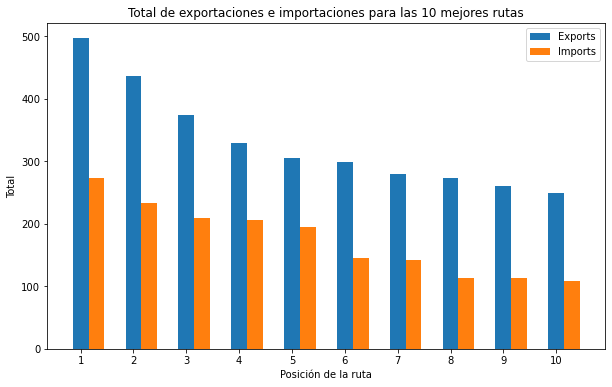

In [5]:
# se declaran dos métodos para obtener el dataframe con las 10 rutas con mayor flujo y arreglo que permita comparar 
# tanto en exportaciones como en importaciones
def dataset_result(dataframe, direction, column):
    result = dataframe.loc[direction,:].sort_values(by = [column], ascending = False)
    result['name'] = result.index.to_list()  
    return result
def graph_top(data, function, index_n):
    x = data.iloc[0:index_n,:]
    X = x.reset_index()
    graph = x[function].to_numpy()
    return graph
# obtener  tablas con información del número de exportaciones e importaciones, después de aplicar los métodos antes declarados    
exports_data_count = dataset_result(route,'Exports', 'count')
imports_data_count = dataset_result(route,'Imports', 'count')
# Se aplica método para obtener datos a visualizar
graph_e = graph_top(exports_data_count, 'count',10)
graph_i = graph_top(imports_data_count, 'count',10)
# se declara valores de graficación
ind = np.arange(10) + 1
width = 0.3
# se define el grafico que se visualizará
plt.figure(figsize=(10,6))
plt.bar(ind, graph_e,width, label = 'Exports')
plt.bar(ind + width, graph_i,width, label = 'Imports')
plt.xticks(ind)
plt.title("Total de exportaciones e importaciones para las 10 mejores rutas")
plt.ylabel("Total")
plt.xlabel("Posición de la ruta")
plt.legend()

Al observar la gráfica anterior, se comprueba que existe mayor número de exportaciones que importaciones, por tanto haremos un análisis más específicos de las rutas de exportación.

Text(0, 0.5, 'Número de exportaciones')

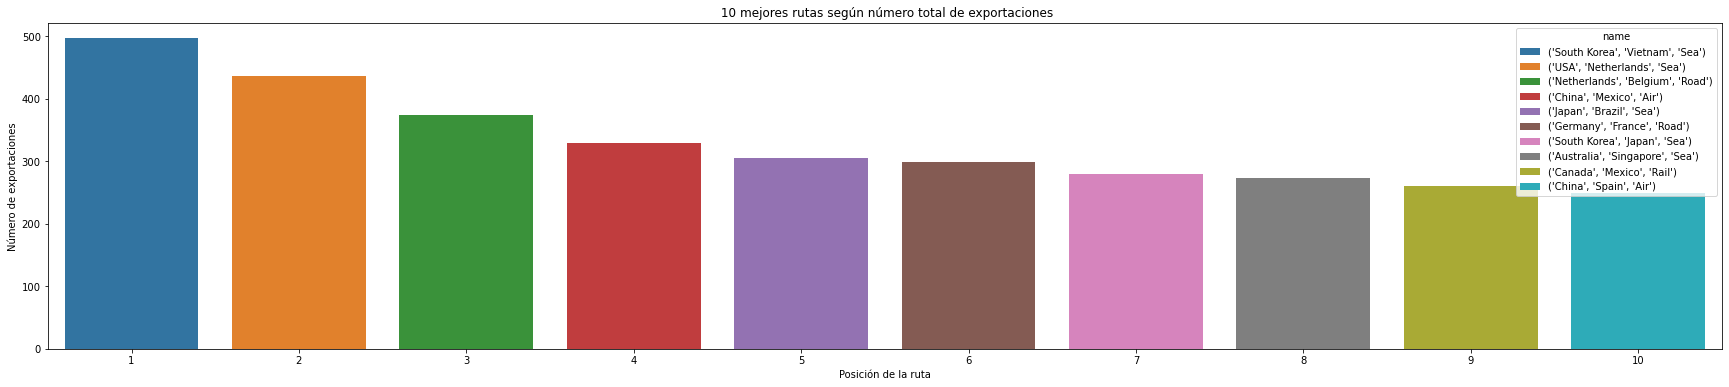

In [6]:
plt.figure(figsize=(30,6))
sns.barplot(data=exports_data_count.head(10), x = ind, y = 'count', hue = 'name', dodge=False)
plt.title(" 10 mejores rutas según número total de exportaciones")
plt.xlabel("Posición de la ruta")
plt.ylabel("Número de exportaciones")

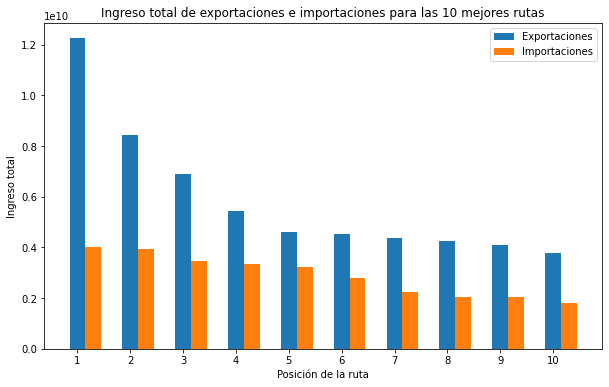

In [7]:
# para obtener la información del ingreso total de las rutas de exportación e importación, se aplica los métodos
# que se han declaradpo anteriormente.
exports_data_sum = dataset_result(route,'Exports', 'sum')
imports_data_sum = dataset_result(route,'Imports', 'sum')
# Se aplica método para obtener datos a visualizar
graph_e_s = graph_top(exports_data_sum, 'sum',10)
graph_i_s = graph_top(imports_data_sum, 'sum',10)
#Creación de un gráfico de doble barras.
plt.figure(figsize=(10,6))
plt.bar(ind, graph_e_s,width, label = 'Exportaciones')
plt.bar(ind + width, graph_i_s,width, label = 'Importaciones')
plt.title("Ingreso total de exportaciones e importaciones para las 10 mejores rutas")
plt.ylabel("Ingreso total")
plt.xlabel("Posición de la ruta")
#Se agrega la leyenda para especificar los datos mostrados
plt.xticks(ind)
plt.legend()

La gráfica anterior, demuestra nuevamente mayor ingreso por las exportaciones que por las importaciones. Por tanto, haremos
un análisis más detallado de estas rutas, para evaluar si coinciden con las rutas más demandadas, que se determinaron en las
gráficas anteriores.

Text(0, 0.5, 'Ingreso total')

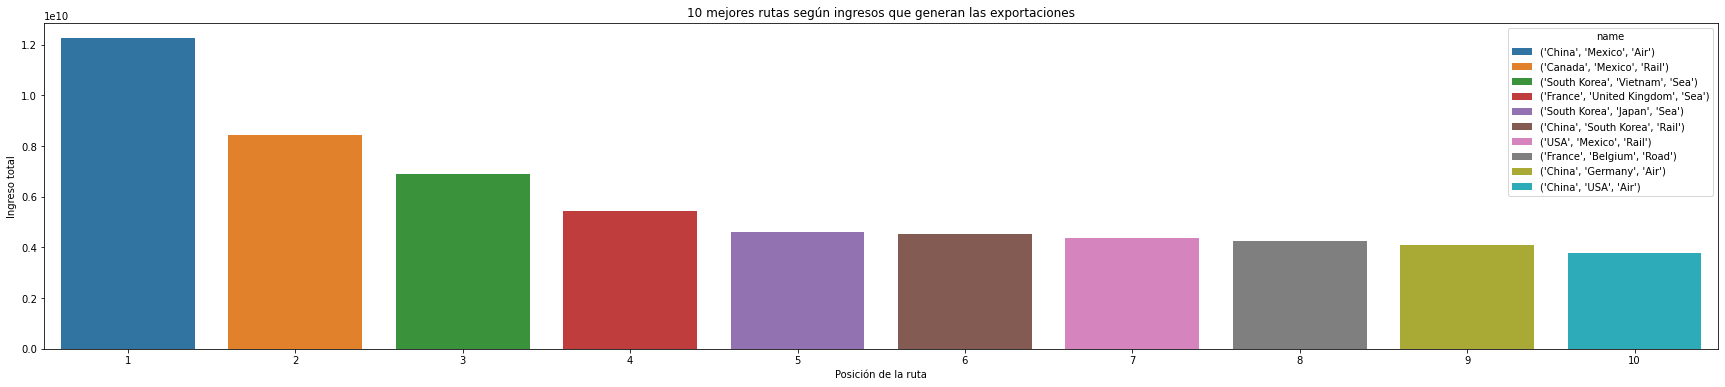

In [8]:
plt.figure(figsize=(30,6))
sns.barplot(data = exports_data_sum.head(10), x = ind, y = 'sum', hue = 'name', dodge=False)
plt.title("10 mejores rutas según ingresos que generan las exportaciones")
plt.xlabel("Posición de la ruta")
plt.ylabel("Ingreso total")

Si analizamos los gráficos anteriores, las 10 mejores rutas de exportación e importación se evalúan por el número de veces que se ejecutaron y por el total de ingresos que generaron. Pero no todas las rutas son coincidentes, o sea, dentro de las 10 más solicitadas no están las 10 rutas que más ingresos generan. 

## Opción 2
 <hr />
 Análisis del valor que generan las importaciones y exportaciones, según el medio de trasnporte utilizado.

In [9]:
transport_data = synergy_data.groupby(['direction', 'transport_mode']).total_value.agg(['sum'])
transport_data.head(8)

sum
direction transport_mode             
Exports   Air             32785147000
          Rail            34505043000
          Road            27280486000
          Sea             65592622000
Imports   Air              5477000000
          Rail             9123000000
          Road             5990000000
          Sea             34938000000

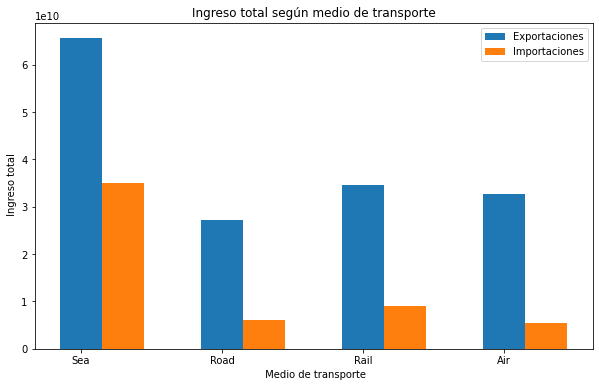

In [10]:
transport_exports = dataset_result(transport_data,'Exports', 'transport_mode')
transport_imports = dataset_result(transport_data,'Imports', 'transport_mode')
graph_e_t = graph_top(transport_exports,'sum',4)
graph_i_t = graph_top(transport_imports,'sum',4)
#
inx =  np.arange(4)
wth = 0.3
plt.figure(figsize=(10,6))
plt.bar(inx, graph_e_t, wth, label = 'Exportaciones')
plt.bar(inx + wth, graph_i_t,wth, label = 'Importaciones')
plt.title("Ingreso total según medio de transporte")
plt.xlabel(" Medio de transporte")
plt.ylabel(" Ingreso total")
plt.xticks(inx, transport_exports['name'])
plt.legend()


La gráfica anterior muestra como se desarrolla el ingreso de cada medio de transporte que utiliza Synergy logistics. Vemos que las exportaciones por Mar, Aire y Tren tienen mayores valores de ingresos, además de poder determinar que los servicios por Carretera pueden ser reducidos.

## Opción 3
<hr />
Análisis de los países que generan el 80% del valor de las exportaciones e importaciones, para determinar el grupo de países donde enfocar la nueva estrategia.

In [11]:
# Obtener el grupo de países con generen mayores valores de exportaciones e importaciones 
country_revenue = synergy_data.groupby(['direction', 'origin']).sum()
country_revenue.sort_values(by = ['total_value'], ascending = False)
# Crear dos tablas diferentes que brinden las información los países con mayor ingresos para exportaciones e importaciones
country_revenue_exports = country_revenue.xs('Exports').sort_values(by = ['total_value'], ascending = False)
country_revenue_imports = country_revenue.xs('Imports').sort_values(by = ['total_value'], ascending = False)
# agregar columna de porcentaje acumulado.
country_revenue_exports['porcentaje_acumulado'] = 100 * (country_revenue_exports.total_value.cumsum()/ country_revenue_exports.total_value.sum())

Text(0, 0.5, 'Porcentaje acumulado')

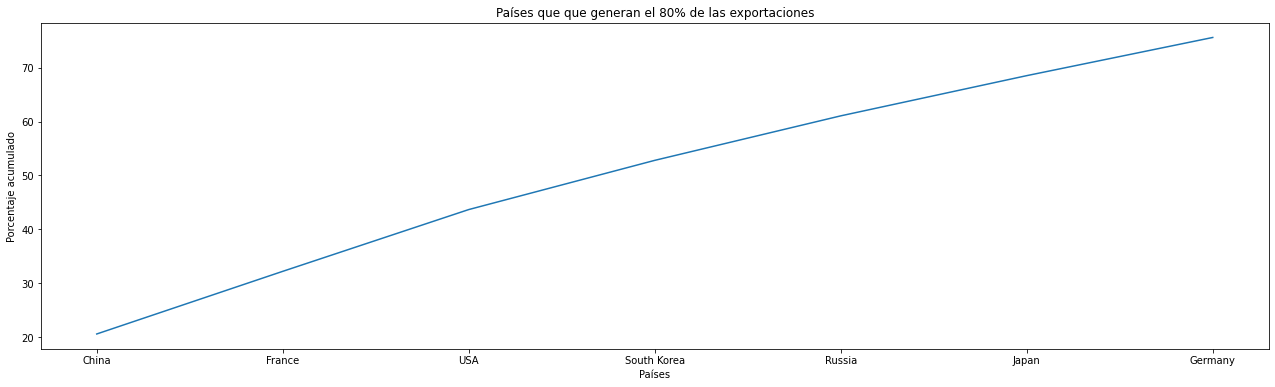

In [12]:
# gráfica que demuestra el acumulado ingresos de las exportaciones por países.
plt.figure(figsize=(22,6))
sns.lineplot( x = 'origin', y = 'porcentaje_acumulado', data = country_revenue_exports[country_revenue_exports["porcentaje_acumulado"] < 80])
plt.title("Países que que generan el 80% de las exportaciones")
plt.xlabel("Países")
plt.ylabel("Porcentaje acumulado")

Text(0, 0.5, 'Porcentaje acumulado')

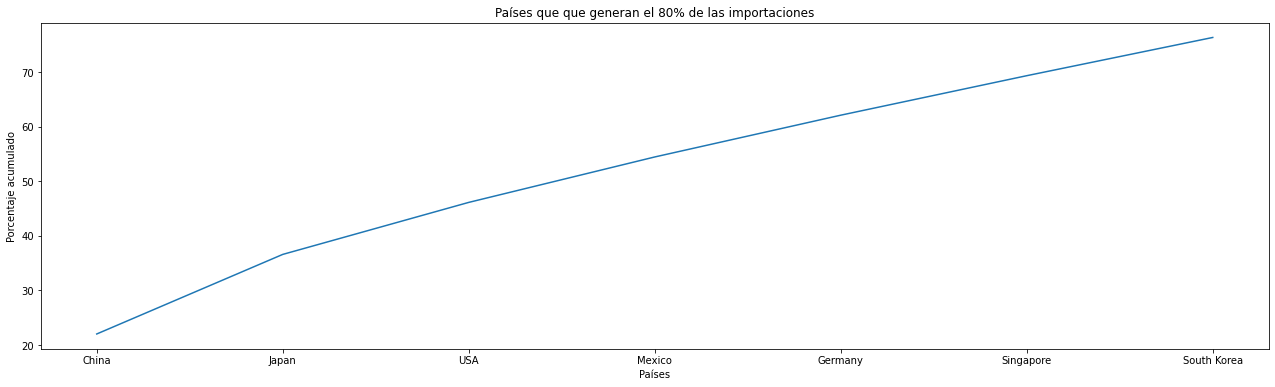

In [13]:
# se realiza el mismo análisis anterior para obtener el valor de las importaciones
country_revenue_imports['porcentaje_acumulado'] = 100 * (country_revenue_imports.total_value.cumsum() / country_revenue_imports.total_value.sum())
# se genera la gráfica para los países que generan el 80% de las importaciones
plt.figure(figsize=(22,6))
sns.lineplot( x = 'origin', y = 'porcentaje_acumulado', data = country_revenue_imports[country_revenue_imports["porcentaje_acumulado"] < 80])
plt.title("Países que que generan el 80% de las importaciones")
plt.xlabel("Países")
plt.ylabel("Porcentaje acumulado")

Las gráficas anteriores permite determinar los grupos de países que generan el mayor por ciento de las importaciones y exportaciones, aunque no son todos coicidentes en ambos servicios, o sea, en el grupo de países donde se concentra el 80%  de las exportaciones (China, Francia, EE.UU, Corea del Sur, Rusia, Japón, Alemania) no se encuentran todos los países que generan el 80% de las importaciones (China, Japón, EE.UU, México, Alemania, Singapur, Corea del Sur)

# CONCLUSIÓN
<hr />

Despúes de analizar la información que brinda cada una de las opciones aplicadas, se pueden crear un nuevo enfoque de la estrategia operativa sobre las mejores rutas de exportación que generan los mayores ingresos y el grupo de países que generan el 80% de las exportaciones.

Como resultado se obtiene que la estrategia operativa 2021 debe estar enfocada en las siguientes rutas de exportaciones que incluyen los países dentro del grupo que acumula el 80% del valor de las exportaciones:

1. De China a México, vía aérea.
2. De Corea del Sur a México, vía marítima.
3. De China a Corea de Sur, vía férrea.
4. De Estados Unidos a México, vía férrea.
5. De China a Alemania, vía aérea.
6. De China a Estados Unidos, vía aérea.


# ANEXO
<hr />
<a> Link to Github: <https://github.com/ari-analytics-88/EmtechCourse> </a>